In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# add the src directory to the path
import sys
sys.path.append('../src')

from config import settings
from preprocess import preprocessor, _normalized_growth
from data_loader import load_data

df = load_data(settings.FILE_NAME)

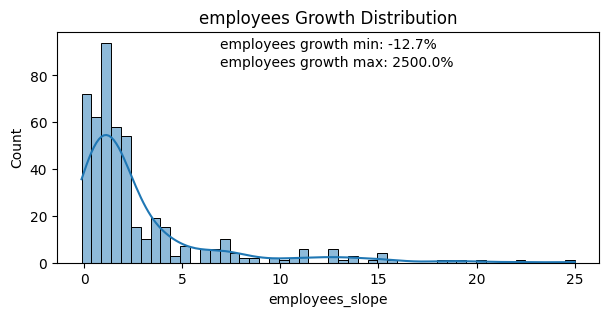

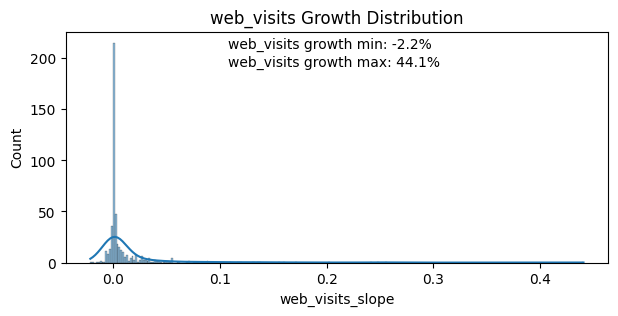

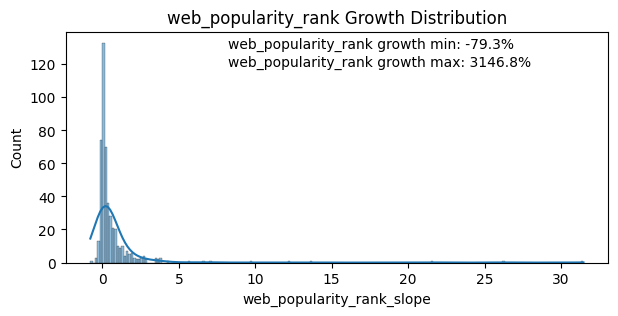

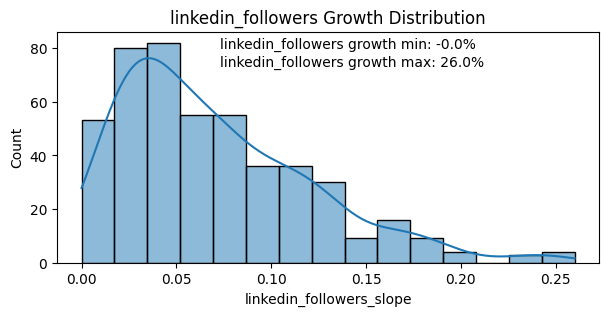

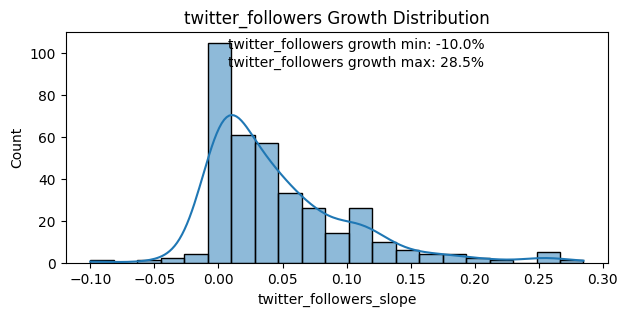

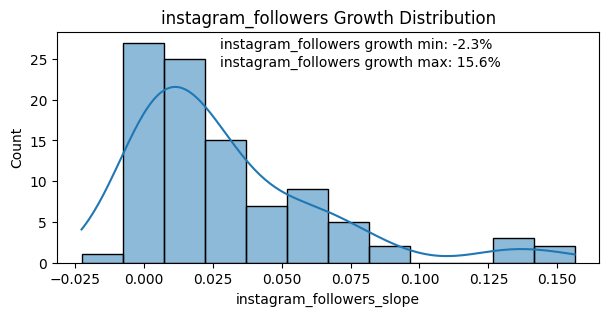

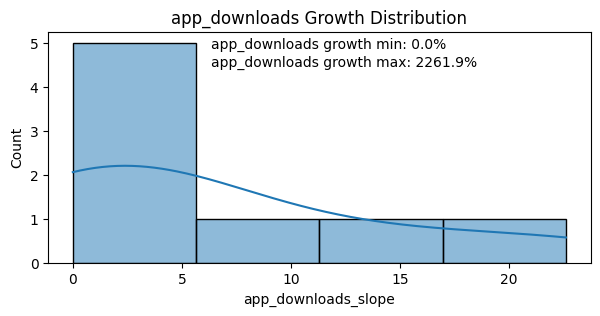

In [14]:
# processed data
processed_data = preprocessor(df)

metrics = list(settings.GROWTH_METRICS.keys())

# plot histrograms of the metrics_slope
for metric in metrics:
    plt.figure(figsize=(7, 3))
    sns.histplot(processed_data[f"{metric}_slope"], kde=True)
    plt.title(f"{metric} Growth Distribution")
    # print min and max values to 1 decimal places
    min_grwoth = f"{metric} growth min: {processed_data[f'{metric}_slope'].min()*100:.1f}%"
    max_growth = f"{metric} growth max: {processed_data[f'{metric}_slope'].max()*100:.1f}%"
    plt.text(0.3, 0.93, min_grwoth, transform=plt.gca().transAxes)
    plt.text(0.3, 0.85, max_growth, transform=plt.gca().transAxes)
    plt.show()

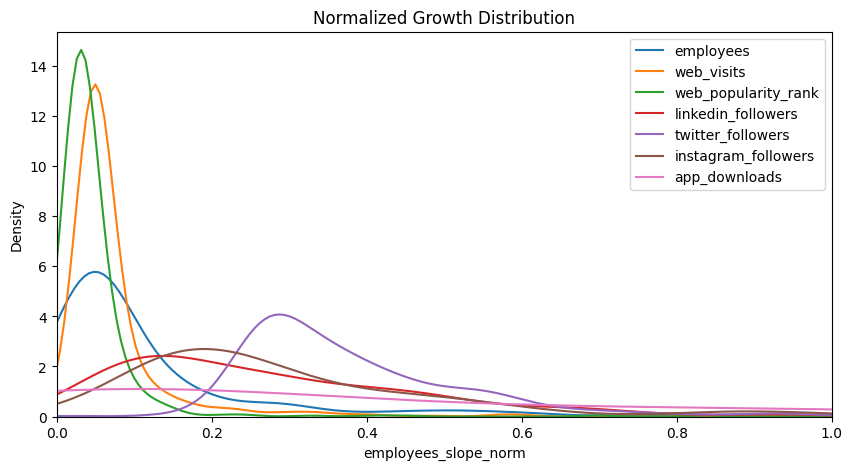

In [27]:
# normalize each growth metric - i.e. metric_slope - between 0 and 1
def calc_norm_of_series(series: pd.Series) -> pd.Series:
    return (series - series.min()) / (series.max() - series.min())
for metric in metrics:
    processed_data[f"{metric}_slope_norm"] = calc_norm_of_series(processed_data[f"{metric}_slope"])

# plot the metric_slope_norm histograms, all on the same plot
plt.figure(figsize=(10, 5))
for metric in metrics:
    sns.kdeplot(processed_data[f"{metric}_slope_norm"], label=metric)

plt.title("Normalized Growth Distribution")
plt.legend()
plt.xlim(0, 1)
plt.show()
